In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files
import seaborn as sns 
from scipy.io import arff 
uploaded = files.upload()

Saving csv_result-EEG Eye State.csv to csv_result-EEG Eye State.csv


In [ ]:
df = pd.read_csv('csv_result-EEG Eye State.csv', header=19, names=['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Eye State'])
df.head()
# '1' indicates the eye-closed and '0' the eye-open state

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,Eye State
20,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
21,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
22,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
23,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
24,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14980 entries, 20 to 14999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AF3        14980 non-null  float64
 1   F7         14980 non-null  float64
 2   F3         14980 non-null  float64
 3   FC5        14980 non-null  float64
 4   T7         14980 non-null  float64
 5   P7         14980 non-null  float64
 6   O1         14980 non-null  float64
 7   O2         14980 non-null  float64
 8   P8         14980 non-null  float64
 9   T8         14980 non-null  float64
 10  FC6        14980 non-null  float64
 11  F4         14980 non-null  float64
 12  F8         14980 non-null  float64
 13  AF4        14980 non-null  float64
 14  Eye State  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.8 MB


In [ ]:
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,Eye State
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


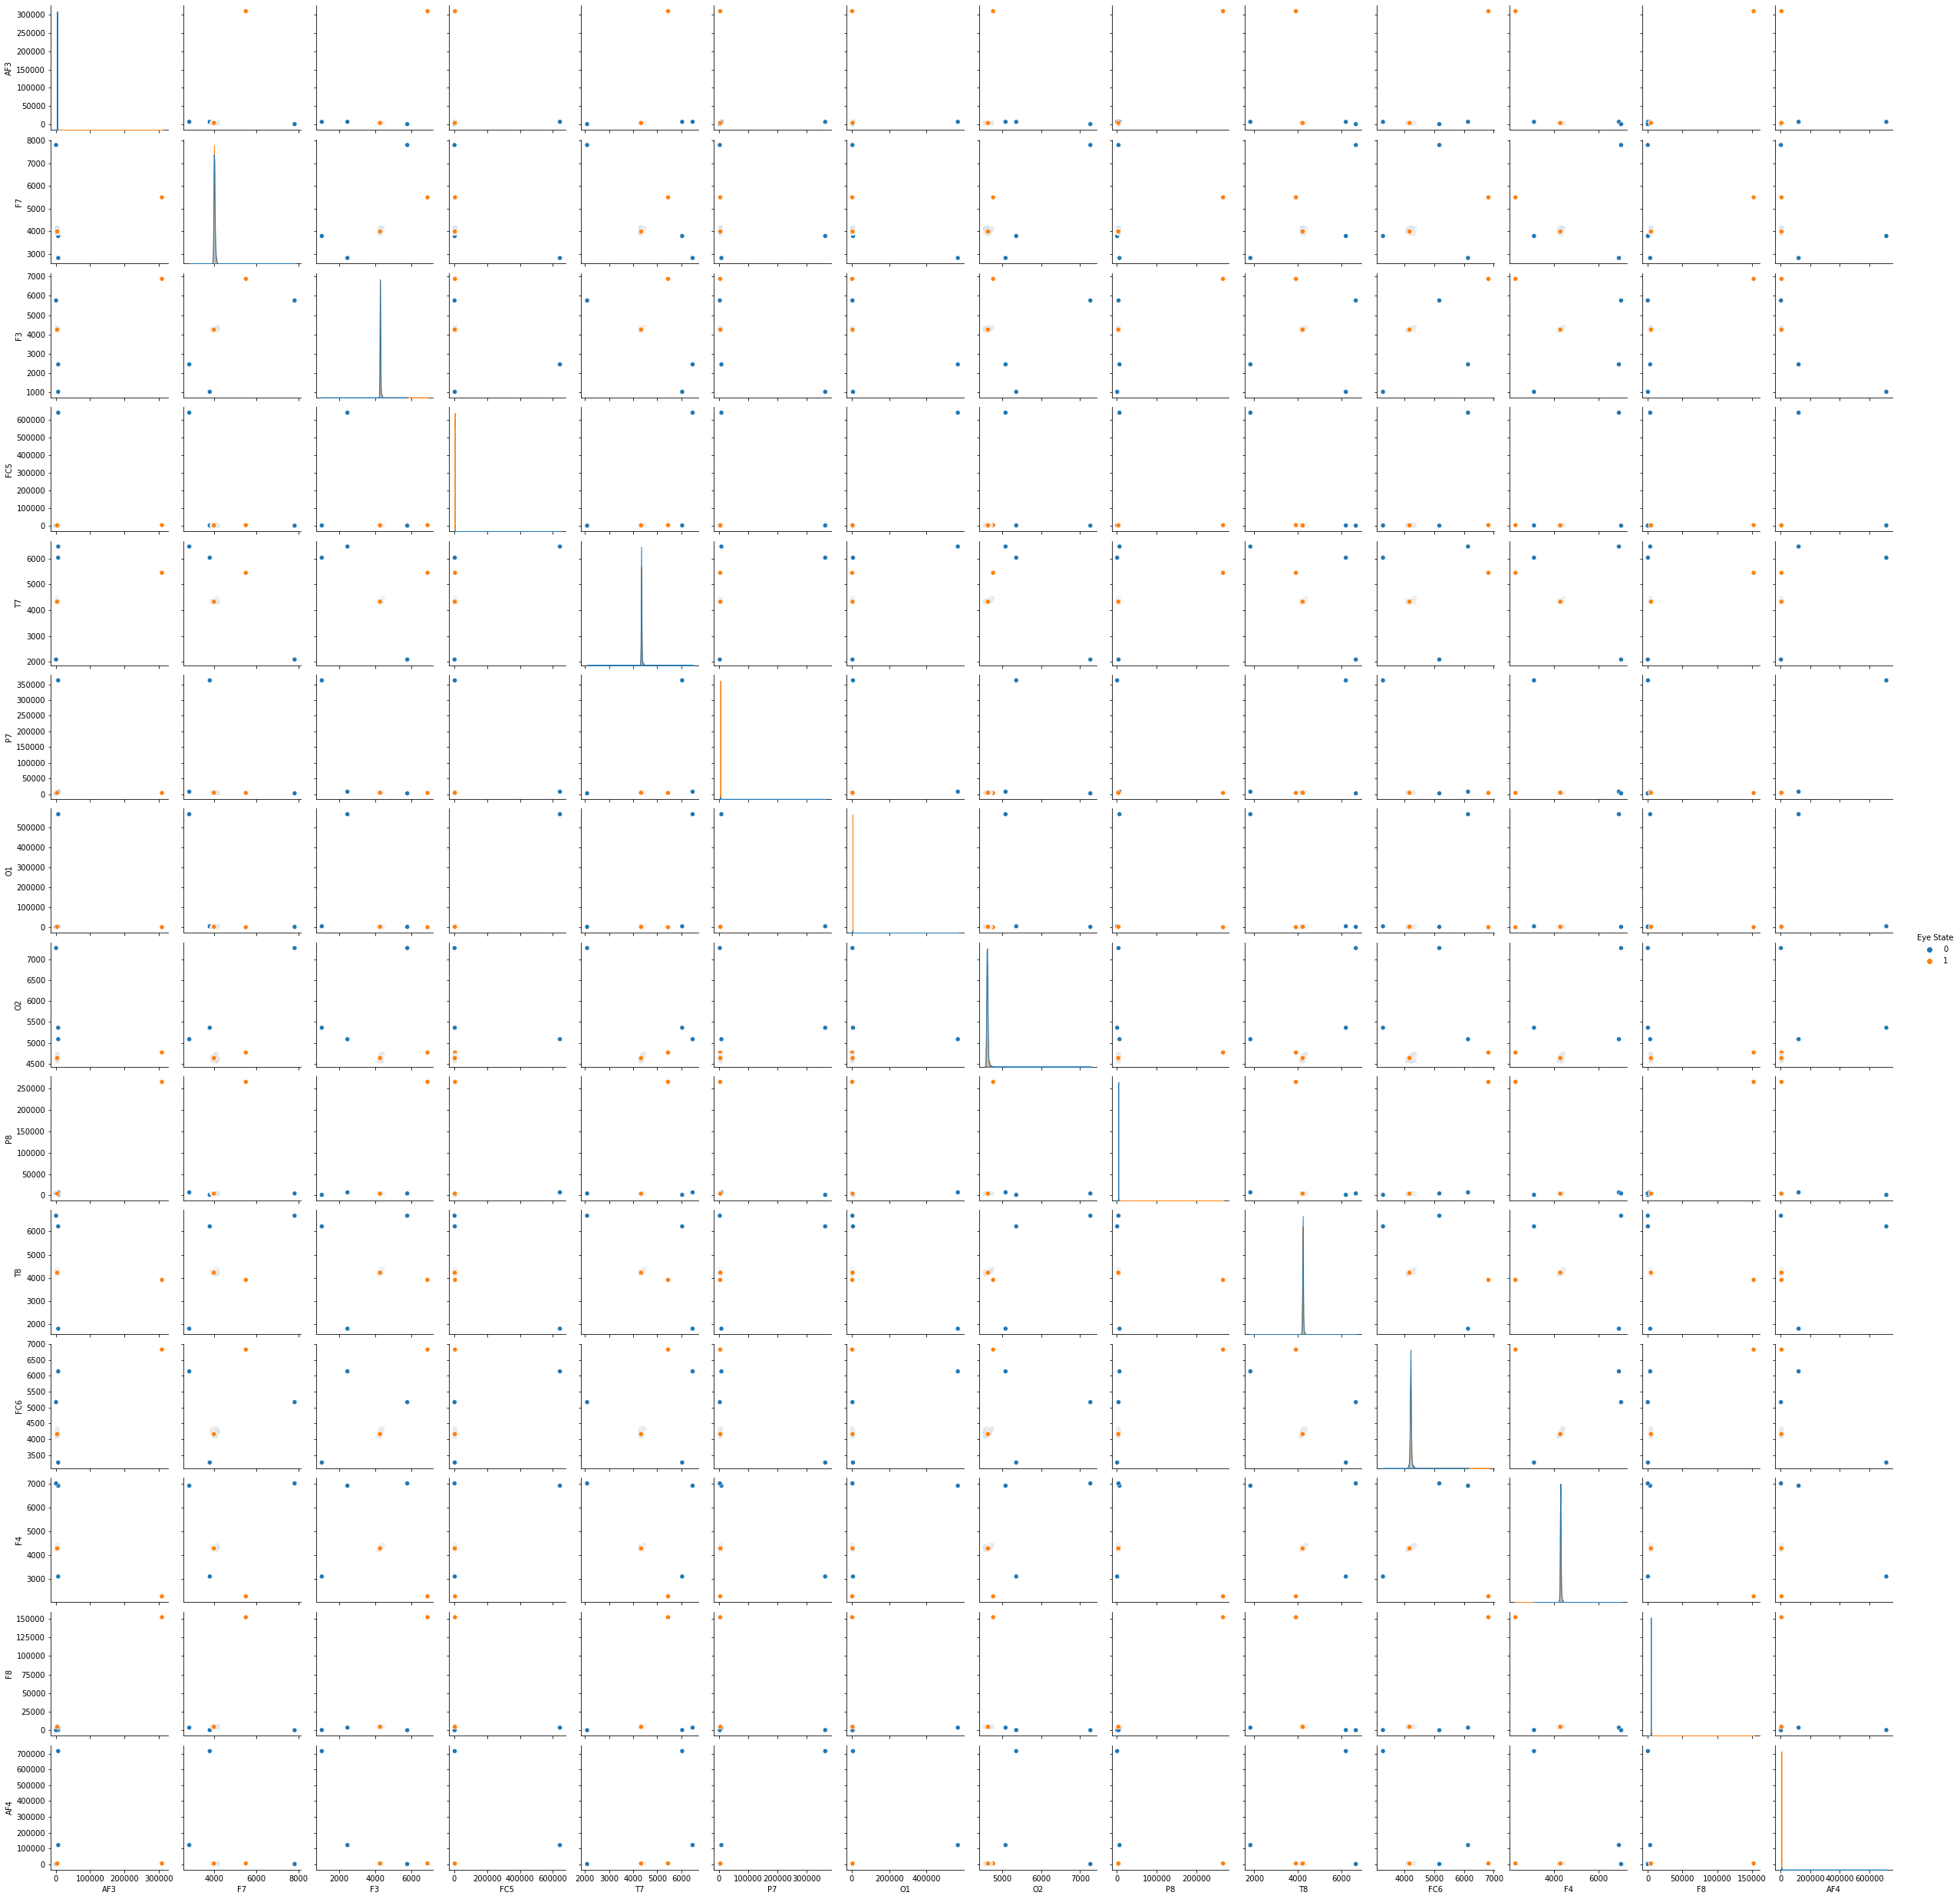

In [ ]:
sns.pairplot(df, hue='Eye State')

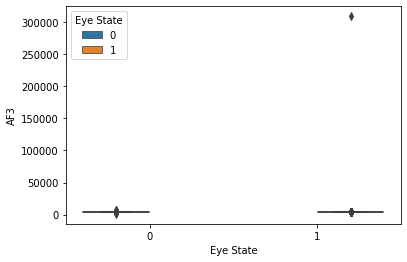

In [ ]:
sns.boxplot(x=df['Eye State'], y=df['AF3'], hue=df['Eye State'])

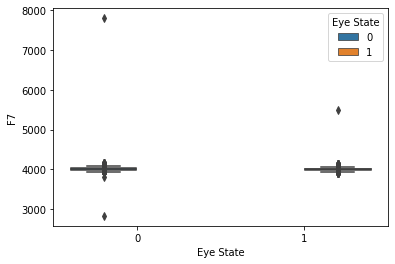

In [ ]:
sns.boxplot(x=df['Eye State'], y=df['F7'], hue=df['Eye State'])

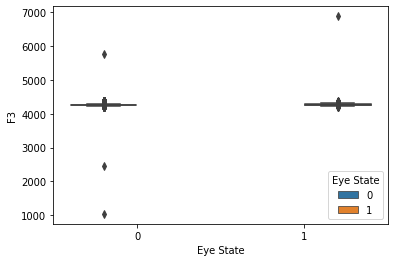

In [ ]:
sns.boxplot(x=df['Eye State'], y=df['F3'], hue=df['Eye State'])

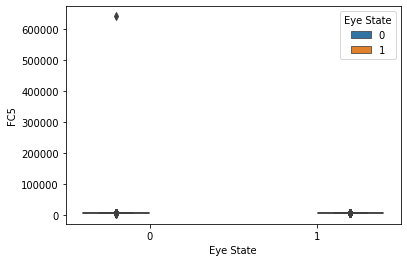

In [ ]:
sns.boxplot(x=df['Eye State'], y=df['FC5'], hue=df['Eye State'])

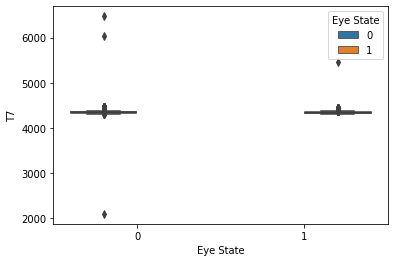

In [ ]:
sns.boxplot(x=df['Eye State'], y=df['T7'], hue=df['Eye State'])

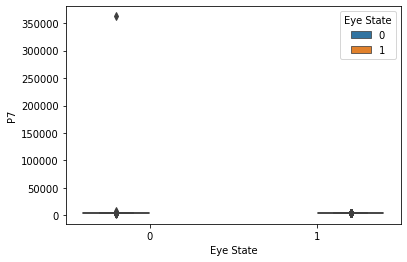

In [ ]:
sns.boxplot(x=df['Eye State'], y=df['P7'], hue=df['Eye State'])

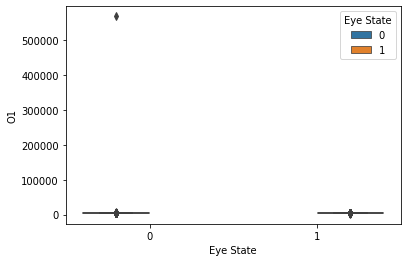

In [ ]:
sns.boxplot(x=df['Eye State'], y=df['O1'], hue=df['Eye State'])

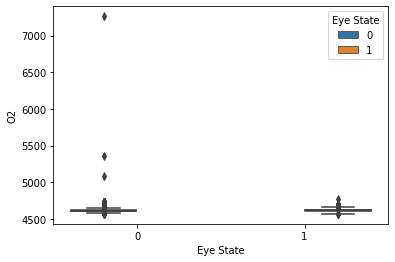

In [ ]:
sns.boxplot(x=df['Eye State'], y=df['O2'], hue=df['Eye State'])

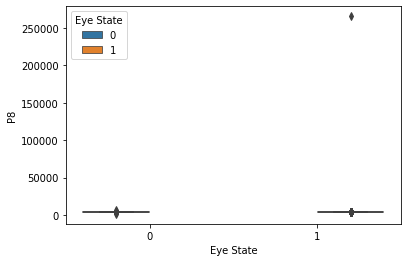

In [ ]:
sns.boxplot(x=df['Eye State'], y=df['P8'], hue=df['Eye State'])

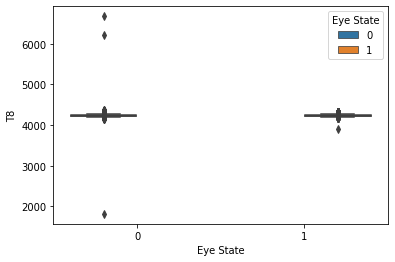

In [ ]:
sns.boxplot(x=df['Eye State'], y=df['T8'], hue=df['Eye State'])

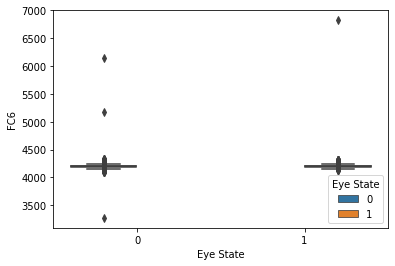

In [ ]:
sns.boxplot(x=df['Eye State'], y=df['FC6'], hue=df['Eye State'])

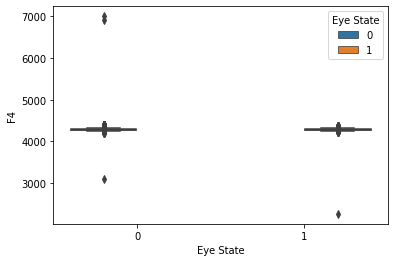

In [ ]:
sns.boxplot(x=df['Eye State'], y=df['F4'], hue=df['Eye State'])

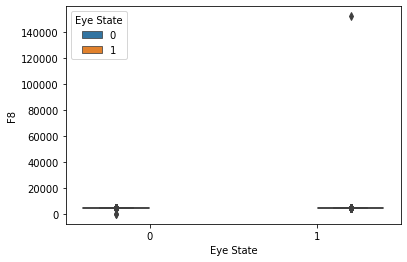

In [ ]:
sns.boxplot(x=df['Eye State'], y=df['F8'], hue=df['Eye State'])

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Eye State'])
Y = df['Eye State']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

training_errors = []
test_errors = []
k_values = []

for i in range(20, 1, -2): 
  kneigh = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
  kneigh.fit(X_train, Y_train)
  Y_trainpredict = kneigh.predict(X_train)
  training_errors.append(1-accuracy_score(Y_train, Y_trainpredict))
  Y_testpredict = kneigh.predict(X_test)
  test_errors.append(1-accuracy_score(Y_test, Y_testpredict))
  k_values.append(i)

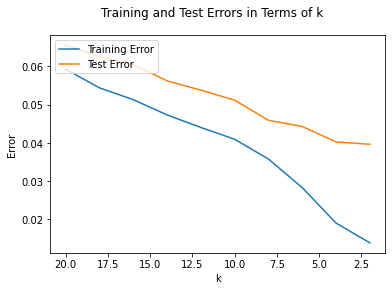

In [ ]:
fig, ax = plt.subplots()
line1 = ax.plot(k_values, training_errors, label='Training Error')
line2 = ax.plot(k_values, test_errors, label = 'Test Error')
plt.legend(loc='upper left')
fig.suptitle('Training and Test Errors in Terms of k', fontsize=12)
ax.set_xlabel('k', fontsize=10)
ax.set_ylabel('Error', fontsize='medium')
ax.invert_xaxis()
ax.xaxis.label.set_size(10)
plt.draw()